<a href="https://colab.research.google.com/github/linyuehzzz/census_privacy/blob/main/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##**Unconstrained Model**

####**Spatial reidentification risks**

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

df = pd.read_csv('data/tables/reid_risk_un.csv')
## Franklin, block level
df_f_blk = df[(df["county"] == "Franklin") & (df["aggregation.level"] == "blk")]
df_f_blk = df_f_blk.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Franklin, block group level
df_f_bg = df[(df["county"] == "Franklin") & (df["aggregation.level"] == "bg")]
df_f_bg = df_f_bg.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Franklin, tract level
df_f_tr = df[(df["county"] == "Franklin") & (df["aggregation.level"] == "tr")]
df_f_tr = df_f_tr.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Guernsey, tract level
df_g_blk = df[(df["county"] == "Guernsey") & (df["aggregation.level"] == "blk")]
df_g_blk = df_g_blk.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Guernsey, block group level
df_g_bg = df[(df["county"] == "Guernsey") & (df["aggregation.level"] == "bg")]
df_g_bg = df_g_bg.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Guernsey, tract level
df_g_tr = df[(df["county"] == "Guernsey") & (df["aggregation.level"] == "tr")]
df_g_tr = df_g_tr.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')
df_g_tr

/content/gdrive/My Drive/Colab Notebooks/census_privacy


risk.type    ppv                  tpr              
qid            1      2      3      1      2      3
plb                                                
0.01       0.003  0.034  0.076  0.010  0.003  0.002
0.10       0.003  0.035  0.105  0.032  0.009  0.007
1.60       0.003  0.037  0.271  0.127  0.036  0.026
10.00      0.004  0.050  0.452  0.310  0.090  0.066
100.00     0.084  0.527  0.952  0.794  0.279  0.206

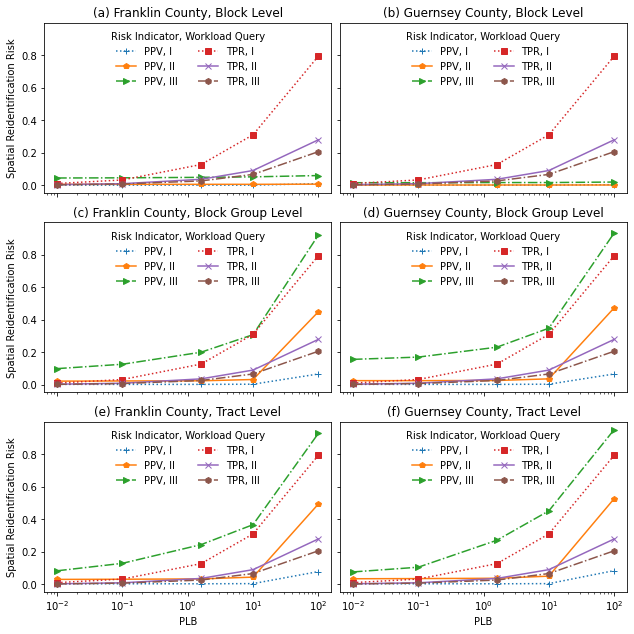

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize = (10,10))

## Franklin, block level
ax = df_f_blk.plot(xticks=df_f_blk.index, style=['+:','p-','>-.','s:','x-','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[0, 0])
ax.set_xscale('log')
ax.legend(title='Risk Indicator, Workload Query', labels=['PPV, I', 'PPV, II', 'PPV, III', 'TPR, I', 'TPR, II', 'TPR, III'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(a) Franklin County, Block Level")

## Franklin, block group level
ax = df_f_bg.plot(xticks=df_f_bg.index, style=['+:','p-','>-.','s:','x-','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[1, 0])
ax.set_xscale('log')
ax.legend(title='Risk Indicator, Workload Query', labels=['PPV, I', 'PPV, II', 'PPV, III', 'TPR, I', 'TPR, II', 'TPR, III'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(c) Franklin County, Block Group Level")

## Franklin, tract level
ax = df_f_tr.plot(xticks=df_f_tr.index, style=['+:','p-','>-.','s:','x-','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[2, 0])
ax.set_xscale('log')
ax.legend(title='Risk Indicator, Workload Query', labels=['PPV, I', 'PPV, II', 'PPV, III', 'TPR, I', 'TPR, II', 'TPR, III'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(e) Franklin County, Tract Level")

## Guernsey, block level
ax = df_g_blk.plot(xticks=df_g_blk.index, style=['+:','p-','>-.','s:','x-','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[0, 1])
ax.set_xscale('log')
ax.legend(title='Risk Indicator, Workload Query', labels=['PPV, I', 'PPV, II', 'PPV, III', 'TPR, I', 'TPR, II', 'TPR, III'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(b) Guernsey County, Block Level")

## Guernsey, block group level
ax = df_g_bg.plot(xticks=df_g_bg.index, style=['+:','p-','>-.','s:','x-','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[1, 1])
ax.set_xscale('log')
ax.legend(title='Risk Indicator, Workload Query', labels=['PPV, I', 'PPV, II', 'PPV, III', 'TPR, I', 'TPR, II', 'TPR, III'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(d) Guernsey County, Block Group Level")

## Guernsey, tract level
ax = df_g_tr.plot(xticks=df_g_tr.index, style=['+:','p-','>-.','s:','x-','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[2, 1])
ax.set_xscale('log')
ax.legend(title='Risk Indicator, Workload Query', labels=['PPV, I', 'PPV, II', 'PPV, III', 'TPR, I', 'TPR, II', 'TPR, III'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(f) Guernsey County, Tract Level")

plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)
plt.savefig('data/tables/reid_risk_un.eps', format='eps')

##**Constrained Model**

####**Spatial reidentification risks**

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

df = pd.read_csv('data/tables/reid_risk_con.csv')
## Franklin, block level
df_f_blk = df[(df["county"] == "Franklin") & (df["aggregation.level"] == "blk")]
df_f_blk = df_f_blk.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Franklin, block group level
df_f_bg = df[(df["county"] == "Franklin") & (df["aggregation.level"] == "bg")]
df_f_bg = df_f_bg.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Franklin, tract level
df_f_tr = df[(df["county"] == "Franklin") & (df["aggregation.level"] == "tr")]
df_f_tr = df_f_tr.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Guernsey, tract level
df_g_blk = df[(df["county"] == "Guernsey") & (df["aggregation.level"] == "blk")]
df_g_blk = df_g_blk.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Guernsey, block group level
df_g_bg = df[(df["county"] == "Guernsey") & (df["aggregation.level"] == "bg")]
df_g_bg = df_g_bg.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Guernsey, tract level
df_g_tr = df[(df["county"] == "Guernsey") & (df["aggregation.level"] == "tr")]
df_g_tr = df_g_tr.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')
df_g_tr

/content/gdrive/My Drive/Colab Notebooks/census_privacy


risk.type    ppv                tpr            
qid            1      2    3      1      2    3
plb                                            
0.01       0.000  0.000  0.0  0.000  0.000  0.0
0.10       0.000  0.000  0.0  0.000  0.000  0.0
1.60       0.031  0.059  0.0  0.016  0.024  0.0
10.00      0.119  0.186  0.0  0.129  0.190  0.0
100.00     0.212  0.128  0.0  0.226  0.143  0.0

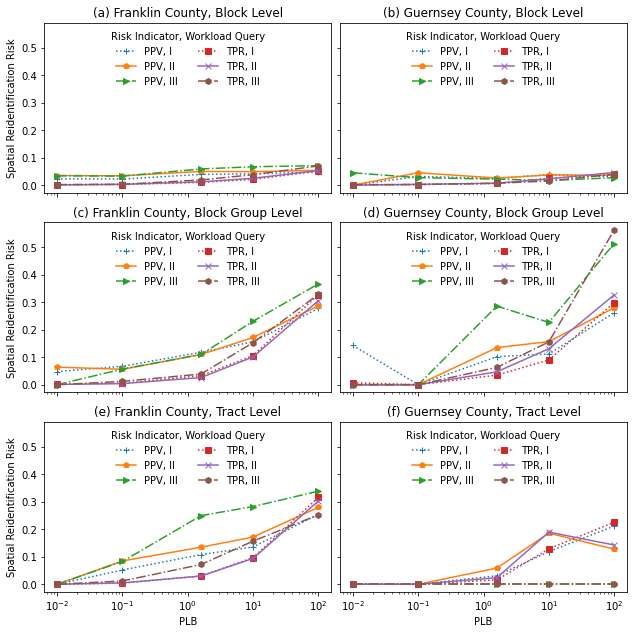

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize = (10,10))

## Franklin, block level
ax = df_f_blk.plot(xticks=df_f_blk.index, style=['+:','p-','>-.','s:','x-','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[0, 0])
ax.set_xscale('log')
ax.legend(title='Risk Indicator, Workload Query', labels=['PPV, I', 'PPV, II', 'PPV, III', 'TPR, I', 'TPR, II', 'TPR, III'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(a) Franklin County, Block Level")

## Franklin, block group level
ax = df_f_bg.plot(xticks=df_f_bg.index, style=['+:','p-','>-.','s:','x-','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[1, 0])
ax.set_xscale('log')
ax.legend(title='Risk Indicator, Workload Query', labels=['PPV, I', 'PPV, II', 'PPV, III', 'TPR, I', 'TPR, II', 'TPR, III'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(c) Franklin County, Block Group Level")

## Franklin, tract level
ax = df_f_tr.plot(xticks=df_f_tr.index, style=['+:','p-','>-.','s:','x-','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[2, 0])
ax.set_xscale('log')
ax.legend(title='Risk Indicator, Workload Query', labels=['PPV, I', 'PPV, II', 'PPV, III', 'TPR, I', 'TPR, II', 'TPR, III'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(e) Franklin County, Tract Level")

## Guernsey, block level
ax = df_g_blk.plot(xticks=df_g_blk.index, style=['+:','p-','>-.','s:','x-','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[0, 1])
ax.set_xscale('log')
ax.legend(title='Risk Indicator, Workload Query', labels=['PPV, I', 'PPV, II', 'PPV, III', 'TPR, I', 'TPR, II', 'TPR, III'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(b) Guernsey County, Block Level")

## Guernsey, block group level
ax = df_g_bg.plot(xticks=df_g_bg.index, style=['+:','p-','>-.','s:','x-','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[1, 1])
ax.set_xscale('log')
ax.legend(title='Risk Indicator, Workload Query', labels=['PPV, I', 'PPV, II', 'PPV, III', 'TPR, I', 'TPR, II', 'TPR, III'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(d) Guernsey County, Block Group Level")

## Guernsey, tract level
ax = df_g_tr.plot(xticks=df_g_tr.index, style=['+:','p-','>-.','s:','x-','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[2, 1])
ax.set_xscale('log')
ax.legend(title='Risk Indicator, Workload Query', labels=['PPV, I', 'PPV, II', 'PPV, III', 'TPR, I', 'TPR, II', 'TPR, III'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(f) Guernsey County, Tract Level")

plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)
plt.savefig('data/tables/reid_risk_c.eps', format='eps')

####**Reconstruction risks**

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

df = pd.read_csv('data/tables/recon_risk_con.csv')

## Franklin, block level
df_f_blk = df[df["county"] == "Franklin"]
df_f_blk = df_f_blk.pivot_table(index='plb', columns='aggregation.level', values='risk.value')
df_f_blk = df_f_blk[['blk', 'bg', 'tr']]

## Guernsey, tract level
df_g_blk = df[df["county"] == "Guernsey"]
df_g_blk = df_g_blk.pivot_table(index='plb', columns=['aggregation.level'], values='risk.value')
df_g_blk = df_g_blk[['blk', 'bg', 'tr']]

df_g_blk

/content/gdrive/My Drive/Colab Notebooks/census_privacy


aggregation.level,blk,bg,tr
plb,,,
0.01,0.039,0.776,0.896
0.10,0.063,0.892,0.938
1.60,0.117,0.952,0.972
10.00,0.145,0.969,0.981
100.00,0.165,0.988,0.993


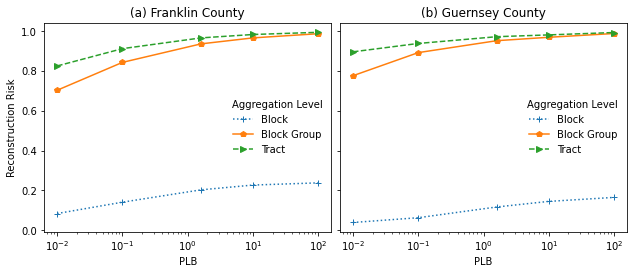

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize = (10,5))

## Franklin
ax = df_f_blk.plot(xticks=df_f_blk.index, style=['+:','p-','>--'], xlabel='PLB', ylabel='Reconstruction Risk', ax=axes[0])
ax.set_xscale('log')
ax.legend(title='Aggregation Level', labels=['Block', 'Block Group', 'Tract'], frameon=False, loc='right', ncol=1)
ax.set_title("(a) Franklin County")

## Guernsey
ax = df_g_blk.plot(xticks=df_g_blk.index, style=['+:','p-','>--'], xlabel='PLB', ylabel='Reconstruction Risk', ax=axes[1])
ax.set_xscale('log')
ax.legend(title='Aggregation Level', labels=['Block', 'Block Group', 'Tract'], frameon=False, loc='right', ncol=1)
ax.set_title("(b) Guernsey County")

plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)
plt.savefig('data/tables/recon_risk.eps', format='eps')

####**Accuracy**

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

df = pd.read_csv('data/tables/acc_con.csv')

## Franklin, block level
df_f_blk = df[df["county"] == "Franklin"]
df_f_blk = df_f_blk.pivot_table(index='plb', columns=['aggregation.level', 'qid'], values='mae')
df_f_blk = df_f_blk[['blk', 'bg', 'tr']]

## Guernsey, tract level
df_g_blk = df[df["county"] == "Guernsey"]
df_g_blk = df_g_blk.pivot_table(index='plb', columns=['aggregation.level', 'qid'], values='mae')
df_g_blk = df_g_blk[['blk', 'bg', 'tr']]

df_g_blk

/content/gdrive/My Drive/Colab Notebooks/census_privacy


aggregation.level    blk                   bg  ...             tr               
qid                    1      2      3      1  ...       3      1      2       3
plb                                            ...                              
0.01               0.010  0.154  2.674  0.142  ...  20.922  0.216  3.070  43.543
0.10               0.009  0.146  2.520  0.064  ...  10.898  0.126  1.498  18.314
1.60               0.008  0.131  2.212  0.028  ...   3.788  0.055  0.629   6.514
10.00              0.008  0.124  2.120  0.018  ...   2.253  0.037  0.386   4.029
100.00             0.007  0.118  2.076  0.007  ...   0.939  0.013  0.163   1.429

[5 rows x 9 columns]

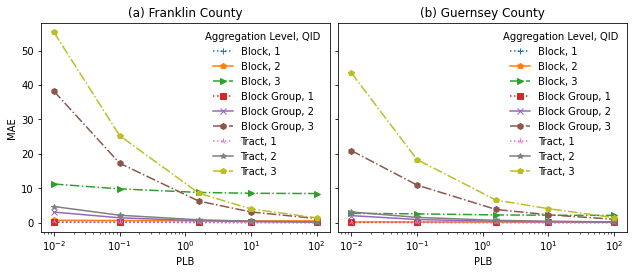

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize = (10,5))

## Franklin
ax = df_f_blk.plot(xticks=df_f_blk.index, style=['+:','p-','>-.','s:','x-','h-.','2:','*-','p-.'], xlabel='PLB', ylabel='MAE', ax=axes[0])
ax.set_xscale('log')
ax.legend(title='Aggregation Level, QID', labels=['Block, 1', 'Block, 2', 'Block, 3', 'Block Group, 1', 'Block Group, 2', 'Block Group, 3', 
                                                  'Tract, 1', 'Tract, 2', 'Tract, 3'], frameon=False, loc='upper right', ncol=1)
ax.set_title("(a) Franklin County")

## Guernsey
ax = df_g_blk.plot(xticks=df_g_blk.index, style=['+:','p-','>-.','s:','x-','h-.','2:','*-','p-.'], xlabel='PLB', ylabel='MAE', ax=axes[1])
ax.set_xscale('log')
ax.legend(title='Aggregation Level, QID', labels=['Block, 1', 'Block, 2', 'Block, 3', 'Block Group, 1', 'Block Group, 2', 'Block Group, 3', 
                                                  'Tract, 1', 'Tract, 2', 'Tract, 3'], frameon=False, loc='upper right', ncol=1)
ax.set_title("(b) Guernsey County")

plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)
plt.savefig('data/tables/acc.eps', format='eps')